In [245]:
# import important modules
import numpy as np
import pandas as pd
# sklearn modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB  # classifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    plot_confusion_matrix,
)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# text preprocessing modules
from string import punctuation
# text preprocessing modules
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re  # regular expression

# Download dependency
for dependency in (
        "brown",
        "names",
        "wordnet",
        "averaged_perceptron_tagger",
        "universal_tagset",
):
    nltk.download(dependency)

import warnings

warnings.filterwarnings("ignore")
# seeding
np.random.seed(123)

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [265]:
import random
random.seed(42) 
import matplotlib.pyplot as plt
import seaborn as sns

# Inline plots in Jupyter notebooks
%matplotlib inline

# better display of review text in dataframes
pd.set_option('display.max_colwidth', 15) 

# Seaborn style
sns.set(style="whitegrid")

In [246]:
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [247]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [327]:
# load data
data = pd.read_csv("allocine_inception_avis9.csv")

In [259]:
# show top five rows of data
data.head()

Note  \
0  5,0   
1  5,0   
2  5,0   
3  5,0   
4  5,0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [328]:
# check the shape of the data
data.shape

(7214, 3)

In [329]:
# check missing values in data
data.isnull().sum()

Note           0
Description    1
key            0
dtype: int64

In [330]:
data.dropna(inplace=True)

In [331]:
data.shape

(7213, 3)

In [332]:
# evalute news sentiment distribution
data.Note.value_counts()

5,0    3513
4,5    1214
4,0     808
0,5     344
3,0     310
3,5     294
2,0     259
2,5     193
1,0     186
1,5      92
Name: Note, dtype: int64

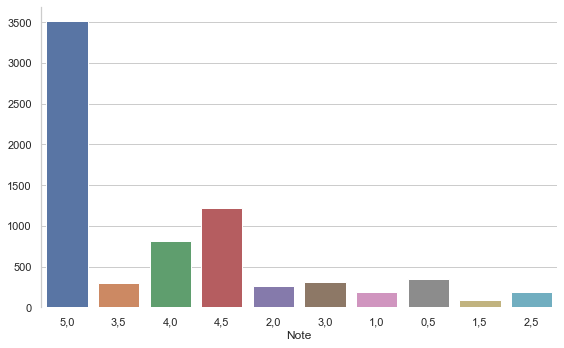

In [292]:
#Rating counts
plt.figure(figsize=(8,5))

ax = sns.countplot(data=data, x='Note')
ax.set(xlabel='Note', ylabel='')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('note_counts.png', dpi=200)

In [333]:
def setClassBin(i):
    if (float(i.replace(',', '.')) >= 4.5):
        return 1
    elif (float(i.replace(',', '.')) <= 2.0):
        return -1
    else:
        return 0

data['Note'] = [setClassBin(x) for x in data.Note]


In [334]:
# evalute news sentiment distribution
data.Note.value_counts()

 1    4727
 0    1605
-1     881
Name: Note, dtype: int64

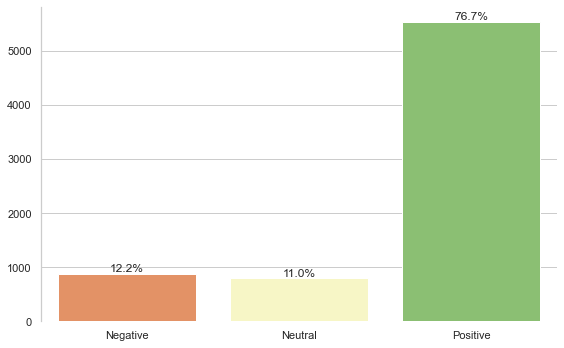

In [298]:
plt.figure(figsize=(8,5))

goodbad_palette = sns.color_palette("RdYlGn_r", n_colors=3)
goodbad_palette.reverse()

ax = sns.countplot(data=data, x='Note', palette=goodbad_palette)
ax.set(xlabel='', ylabel='')
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])

# Frenquencies
ncount = len(data)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('polarity_frequency.png', dpi=200)

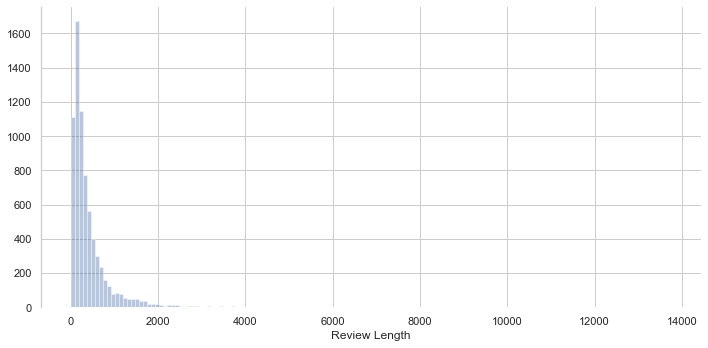

In [301]:
#Reviews length
reviews_length = data['Description'].str.len()

plt.figure(figsize=(10,5))
ax = sns.distplot(reviews_length, bins=150, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Review Length')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('reviews_length.png', dpi=200)

In [302]:
THRESHOLD = 2000
short_reviews = data[data['Description'].str.len() <= THRESHOLD]
long_reviews =  data[data['Description'].str.len() > THRESHOLD]

print("{} reviews with LEN > {} ({:.2f} % of total data)".format(
    len(long_reviews),
    THRESHOLD,
    100 * len(long_reviews) / len(data)
))

169 reviews with LEN > 2000 (2.34 % of total data)


In [303]:
long_reviews.head(1)

,Note,Description,key
1,1,C’est fou c...,1


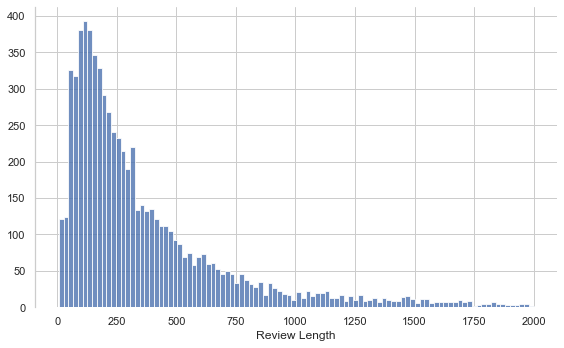

In [304]:
short_reviews_length = short_reviews['Description'].str.len()

plt.figure(figsize=(8,5))
ax = sns.distplot(short_reviews_length, bins=100, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Review Length')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('short_reviews_length.png', dpi=200)

In [305]:
data.head(5)

,Note,Description,key
0,1,Après le ch...,0
1,1,C’est fou c...,1
2,1,CHEF D’ŒUVR...,2
3,1,Un film aus...,3
4,1,Christopher...,4


In [335]:
#Build dataset
dataset_df = data.copy()
initial_len = len(dataset_df)
print("Length: {}".format(initial_len))

Length: 7213


In [307]:
def loss_percentage(df, previous_length):
    new_length = len(df)
    percentage = 100*(1-(new_length/previous_length))    
    return new_length, percentage  

In [310]:
# 2. Drop rows we don't need (neutral polarity)
dataset_df = dataset_df[dataset_df['Note'] != 0]
length, percentage = loss_percentage(dataset_df, initial_len)
print("Length: {} (-{:.1f} %)".format(length, percentage))

Length: 6417 (-11.0 %)


In [336]:
# Change -1 to 0 for negative polarity
dataset_df.loc[dataset_df['Note'] == -1, 'Note'] = 0

In [337]:
dataset_df.groupby('Note').size()

Note
0    2486
1    4727
dtype: int64

In [338]:
# Remove reviews with less than 3 characters
# Done after text processing on purpose
dataset_df = dataset_df[dataset_df['Description'].str.len() > 2]

In [339]:
#Clean review text
import re

def clean_text(text):
    text = text.replace('\xa0', ' ')
    text = text.replace('\x92', "'")
    
    # Substituting multiple spaces with single space
    # Also remove '\n' and '\r' occurences
    text= re.sub(r'\s+', ' ', text, flags=re.I)
    
    return text
 
dataset_df['Description'] = dataset_df['Description'].apply(clean_text)

In [340]:
# better display of review text in dataframes
pd.set_option('display.max_colwidth', None) 

In [341]:
dataset_df.sample(5, random_state=42)

,Note,Description,key
308,0,"Je reprends le synopsis d' allociné et j' adapte: Nolan est un voleur expérimenté – le meilleur qui soit dans l’art périlleux de réaliser un film pour réfléchir un peu. : sa spécialité consiste à s’approprier les secrets les plus précieux d’une mythologie enfouis au plus profond de notre subconscient, pendant que nous rêvons de ce qui nous attend dans son prochain film spectaculaire .du coup , comme c 'est Nolan et que les critiques l' encensent , notre esprit est particulièrement vulnérable. Très recherché pour ses talents dans l’univers trouble du Blockbuster depuis le superbe Batman Begins , Nolan est aussi devenu un réalisateur applaudi dans le monde entier mais qui depuis a perdu tout ce qui nous est cher: la jouissance du suspens, la clarté , la fluidité de la narration et la modestie. Mais une ultime mission pourrait lui permettre de retrouver sa vie d’avant – à condition qu’il puisse accomplir l’impossible : réussir le 3ème volet de Batman. Au lieu de se vautrer comme ici ( et ce flou narratif avait commencé dans le Dark Knight) Nolan et son équipe ont fait l’inverse : implanter l' idée dans nos esprits qu' INCEPTION est un grand film. S’ils y parviennent, il pourrait s’agir du crime parfait. Et pourtant, aussi méthodiques et doués soient-ils, rien n’aurait pu préparer Nolan et ses partenaires à un ennemi redoutable qui semble avoir systématiquement un coup d’avance sur eux: le FUN. Un ennemi dont NOLAN aurait pu soupçonner l’existence mais qu' il a oublié depuis le milieu de the Dark Knight. Hey le ciné de SCI FI , Mr Nolan , c 'est pour s 'évader du quotidien et pas pour créer la sensation inverse: être heureux que le film se termine ...après la vision du DVD , je l' ai jeté à la poubelle ...",8
381,0,La fin fait réflechir et Di Caprio montre l'étendue de son talent à travers un film complexe mais intéressant du maître Christopher Nolan.,6
5716,1,Super.super et encore super,1
2312,0,"Film bien caste mais des longueurs , on s ennuie................(((((((JjjjjjjjjjjjjjjjjjjjJjjjjjjjjjjjjjjjjjjj",2
251,1,"Un scénario grandiose et unique, des acteurs et une mise en scène parfaite, et un grand nombre de rebondissements en font un film magistral.",11


In [342]:
min_num = min(dataset_df.groupby('Note').size())
min_num

2486

In [343]:
#The text_cleaning() function will handle all necessary steps to clean our dataset.
stop_words =  stopwords.words('french')
def text_cleaning(text, remove_stop_words=True, lemmatize_words=True):
    # Clean the text, with the option to remove stop_words and to lemmatize word
    # Clean the text
    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r"\'s", " ", text)
    text =  re.sub(r'http\S+',' link ', text)
    text = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text) # remove numbers
        
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation])
    
    # Optionally, remove stop words
    if remove_stop_words:
        text = text.split()
        text = [w for w in text if not w in stop_words]
        text = " ".join(text)
    
    # Optionally, shorten words to their stems
    if lemmatize_words:
        text = text.split()
        lemmatizer = WordNetLemmatizer() 
        lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
        text = " ".join(lemmatized_words)
    
    # Return a list of words
    return(text)

In [344]:
data = dataset_df.copy()

In [345]:
#clean the review
data["cleaned_review"] = data["Description"].apply(text_cleaning)

In [346]:
data.head()

Note  \
0     1   
1     1   
2     1   
3     1   
4     1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [347]:
#split features and target from  data 
X = data["cleaned_review"]
y = data.Note.values

In [348]:
# split data into train and validate
X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.15,
    random_state=42,
    shuffle=True,
    stratify=y,
)

In [349]:
# Create a classifier in pipeline
sentiment_classifier = Pipeline(steps=[
                               ('pre_processing',TfidfVectorizer(lowercase=False)),
                                 ('clf',LogisticRegression())])

In [350]:
# train the sentiment classifier 
sentiment_classifier.fit(X_train,y_train)

Pipeline(steps=[('pre_processing', TfidfVectorizer(lowercase=False)),
                ('clf', LogisticRegression())])

In [351]:
# test model performance on valid data 
y_preds = sentiment_classifier.predict(X_valid)

In [352]:
accuracy_score(y_valid,y_preds)

0.8188539741219963

In [353]:
#save model 
import joblib 
joblib.dump(sentiment_classifier, 'sentimentsfrench_model_pipeline.pkl')

['sentimentsfrench_model_pipeline.pkl']